In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/Psychedelic_mushroom_DATA.csv')

In [3]:
df.head(5)

,CASEID_7139,COHORTS,PYS_USE_VENN,PSY_USE_YN,PM_USE_YN,PM_USE_ONLY_YN,PM_VS_PSY_YN,SEX,AGE,ETHNICITY,...,PSY2_UNDIAG_CONCERN,PSY2_NO_KNOWLEDGE,PM1_GEN_HEALTH,PM1_DIAG_CONDITION,PM1_UNDIAG_CONCERN,PM2_FREQ_COVID,PM3_FREQ_POLITICS,PM4_CARE,INSURANCE,DATA_WEIGHT
0,1,1.0,1.0,1.0,1.0,1.0,2.0,0,19.0,3.0,...,0,0,1,0,0,2,3,0,0,57772.54
1,2,1.0,1.0,1.0,1.0,1.0,2.0,0,21.0,2.0,...,1,0,1,0,0,3,3,0,1,25738.42
2,3,1.0,1.0,1.0,1.0,1.0,2.0,0,22.0,2.0,...,1,0,0,0,0,3,4,0,0,42172.56
3,4,1.0,1.0,1.0,1.0,1.0,2.0,0,22.0,2.0,...,0,0,1,0,0,3,3,0,1,28356.81
4,5,1.0,1.0,1.0,1.0,1.0,2.0,0,23.0,2.0,...,1,0,1,0,0,3,3,0,1,25738.42


## Baseline Model

In [4]:
# For the baseline model, the predictive variables are: 
# demographic and socioecomomic status, and health conditions.

X1 = df[['SEX', 'AGE', 'ETHNICITY', 'HLS_YN', 'REGION', 'INSURANCE',
        'BMI', 'C_TOTAL', 'C_DP', 'C_ANX', 'C_PN', 'C_ALL', 'C_MI', 'C_INSOM', 'C_HYP', 'C_DH', 'C_SA', 'C_GERD', 'C_CS', 'C_LIP', 
        'CCI_SCORE', 'GAD7_SCORE', 'PHQ9_SCORE', 'GAD7_GE10', 'PHQ9_GE10', 'PCS12', 'MCS12', 'VR6D']]
X1.head(5)

,SEX,AGE,ETHNICITY,HLS_YN,REGION,INSURANCE,BMI,C_TOTAL,C_DP,C_ANX,...,C_CS,C_LIP,CCI_SCORE,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,PCS12,MCS12,VR6D
0,0,19.0,3.0,1.0,4.0,0,27.41,3.0,0.0,1.0,...,0.0,0.0,0.0,3.0,8.0,0.0,0.0,48.99,37.90,0.67
1,0,21.0,2.0,0.0,2.0,1,29.26,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.21,57.93,0.86
2,0,22.0,2.0,0.0,4.0,0,20.60,9.0,1.0,1.0,...,0.0,0.0,0.0,21.0,17.0,1.0,1.0,33.83,25.91,0.47
3,0,22.0,2.0,0.0,3.0,1,18.56,2.0,1.0,1.0,...,0.0,0.0,0.0,5.0,15.0,0.0,1.0,61.63,25.13,0.67
4,0,23.0,2.0,0.0,2.0,1,36.80,4.0,1.0,1.0,...,0.0,0.0,0.0,13.0,15.0,1.0,1.0,38.54,45.53,0.64


In [5]:
df['label'] = df['COHORTS'].replace(-99, 1)
y = df['label']

In [6]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [7]:
model1 = LogisticRegression(solver='liblinear', random_state=42)
model1.fit(X1_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [8]:
print('classes:', model1.classes_)
print('intercept:', model1.intercept_)
print('coef:', model1.coef_)

classes: [0. 1.]
intercept: [0.91667501]
coef: [[ 1.00760067e+00 -4.63653848e-02 -9.19152345e-02  2.61908889e-01
   1.25536029e-01  1.69437418e-01 -4.44690196e-02 -1.72023186e-02
   2.32745759e-01 -1.16503359e-02  3.18866148e-02  1.78972027e-01
   8.58396772e-02 -2.89032127e-01  1.17082871e-01 -1.11895762e-01
   2.71570783e-01 -1.98038462e-01 -2.16974638e-01 -2.11636076e-01
   2.08198351e-01  4.54308009e-03  2.81875088e-02  1.57652004e-01
   2.77593008e-01 -1.69547655e-02  6.74310838e-04 -1.69144861e+00]]


In [9]:
print('predicted probability:', model1.predict_proba(X1_test))
print('predicted value:', model1.predict(X1_test))

predicted probability: [[0.99348082 0.00651918]
 [0.84839401 0.15160599]
 [0.98484023 0.01515977]
 ...
 [0.96643193 0.03356807]
 [0.99064856 0.00935144]
 [0.78937091 0.21062909]]
predicted value: [0. 0. 0. ... 0. 0. 0.]


In [10]:
model1.score(X1_test, y_test)

0.9278711484593838

In [11]:
confusion_matrix(y_test, model1.predict(X1_test))

array([[1324,    3],
       [ 100,    1]])

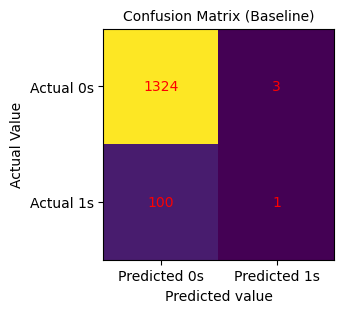

In [12]:
cm = confusion_matrix(y_test, model1.predict(X1_test))

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xlabel("Predicted value")
plt.ylabel("Actual Value")
plt.title("Confusion Matrix (Baseline)", fontsize=10)
plt.show()

In [13]:
print(classification_report(y_test, model1.predict(X1_test)))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1327
         1.0       0.25      0.01      0.02       101

    accuracy                           0.93      1428
   macro avg       0.59      0.50      0.49      1428
weighted avg       0.88      0.93      0.90      1428



<Axes: ylabel='Feature'>

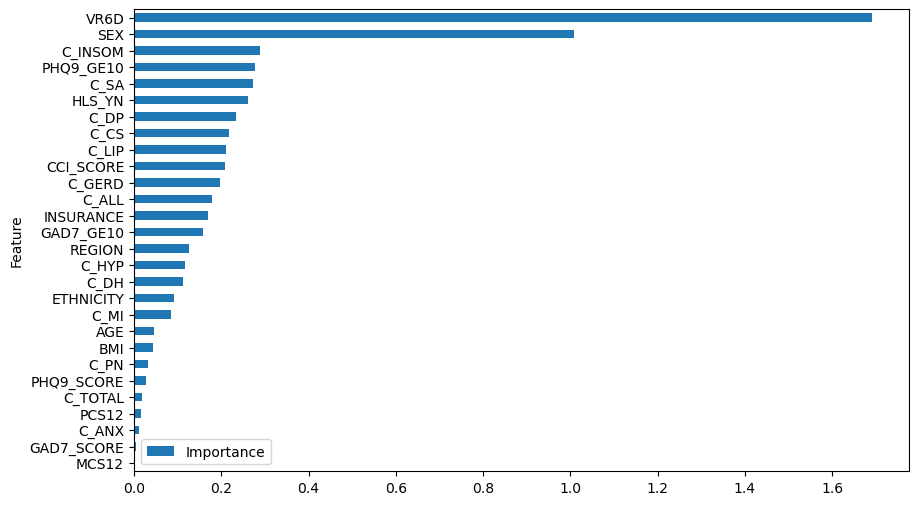

In [14]:
coef_values = model1.coef_[0]

feature_importance = pd.DataFrame({'Feature': X1.columns, 'Importance': np.abs(coef_values)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

## Boosted Model

In [15]:
# For the boosted model, the predictive variables are: 
# demographic and socioecomomic status, health conditions, and knowledge of psychedelic compounds.

X2 = df[['SEX', 'AGE', 'ETHNICITY', 'HLS_YN', 'REGION', 'INSURANCE',
        'BMI', 'C_TOTAL', 'C_DP', 'C_ANX', 'C_PN', 'C_ALL', 'C_MI', 'C_INSOM', 'C_HYP', 'C_DH', 'C_SA', 'C_GERD', 'C_CS', 'C_LIP', 
        'CCI_SCORE', 'GAD7_SCORE', 'PHQ9_SCORE', 'GAD7_GE10', 'PHQ9_GE10', 'PCS12', 'MCS12', 'VR6D',
        'PSY1_POSITIVE_USE', 'PSY2_GEN_HEALTH', 'PSY2_DIAG_CONDITION', 'PSY2_UNDIAG_CONCERN', 'PSY2_NO_KNOWLEDGE']]
X2.head(5)

,SEX,AGE,ETHNICITY,HLS_YN,REGION,INSURANCE,BMI,C_TOTAL,C_DP,C_ANX,...,GAD7_GE10,PHQ9_GE10,PCS12,MCS12,VR6D,PSY1_POSITIVE_USE,PSY2_GEN_HEALTH,PSY2_DIAG_CONDITION,PSY2_UNDIAG_CONCERN,PSY2_NO_KNOWLEDGE
0,0,19.0,3.0,1.0,4.0,0,27.41,3.0,0.0,1.0,...,0.0,0.0,48.99,37.90,0.67,3,1,0,0,0
1,0,21.0,2.0,0.0,2.0,1,29.26,0.0,0.0,0.0,...,0.0,0.0,54.21,57.93,0.86,1,0,0,1,0
2,0,22.0,2.0,0.0,4.0,0,20.60,9.0,1.0,1.0,...,1.0,1.0,33.83,25.91,0.47,3,1,1,1,0
3,0,22.0,2.0,0.0,3.0,1,18.56,2.0,1.0,1.0,...,0.0,1.0,61.63,25.13,0.67,2,1,1,0,0
4,0,23.0,2.0,0.0,2.0,1,36.80,4.0,1.0,1.0,...,1.0,1.0,38.54,45.53,0.64,2,1,1,1,0


In [16]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [17]:
model2 = LogisticRegression(solver='liblinear', random_state=42)
model2.fit(X2_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [18]:
print('classes:', model2.classes_)
print('intercept:', model2.intercept_)
print('coef:', model2.coef_)

classes: [0. 1.]
intercept: [1.7829621]
coef: [[ 0.71013986 -0.03093665 -0.15535336  0.40758448  0.09545209  0.00932056
  -0.02837278 -0.03723555  0.24872084 -0.03350433  0.06388538  0.16006708
   0.12435797 -0.30368586  0.1398178   0.02565767  0.24490328 -0.15952036
  -0.22920181 -0.03861553  0.13371732  0.01337196  0.01885529  0.09466967
   0.15121591 -0.01226901  0.00230985 -0.65597334 -0.70449637  0.1409759
  -0.00501784  0.50769739 -1.23114237]]


In [19]:
print('predicted probability:', model2.predict_proba(X2_test))
print('predicted value:', model2.predict(X2_test))

predicted probability: [[0.99553008 0.00446992]
 [0.95807942 0.04192058]
 [0.99795093 0.00204907]
 ...
 [0.9465201  0.0534799 ]
 [0.99848195 0.00151805]
 [0.90652371 0.09347629]]
predicted value: [0. 0. 0. ... 0. 0. 0.]


In [20]:
model2.score(X2_test, y_test)

0.9299719887955182

In [21]:
confusion_matrix(y_test, model2.predict(X2_test))

array([[1312,   15],
       [  85,   16]])

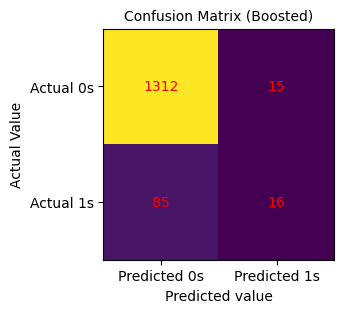

In [22]:
cm = confusion_matrix(y_test, model2.predict(X2_test))

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xlabel("Predicted value")
plt.ylabel("Actual Value")
plt.title("Confusion Matrix (Boosted)", fontsize=10)
plt.show()

In [23]:
print(classification_report(y_test, model2.predict(X2_test)))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1327
         1.0       0.52      0.16      0.24       101

    accuracy                           0.93      1428
   macro avg       0.73      0.57      0.60      1428
weighted avg       0.91      0.93      0.91      1428



<Axes: ylabel='Feature'>

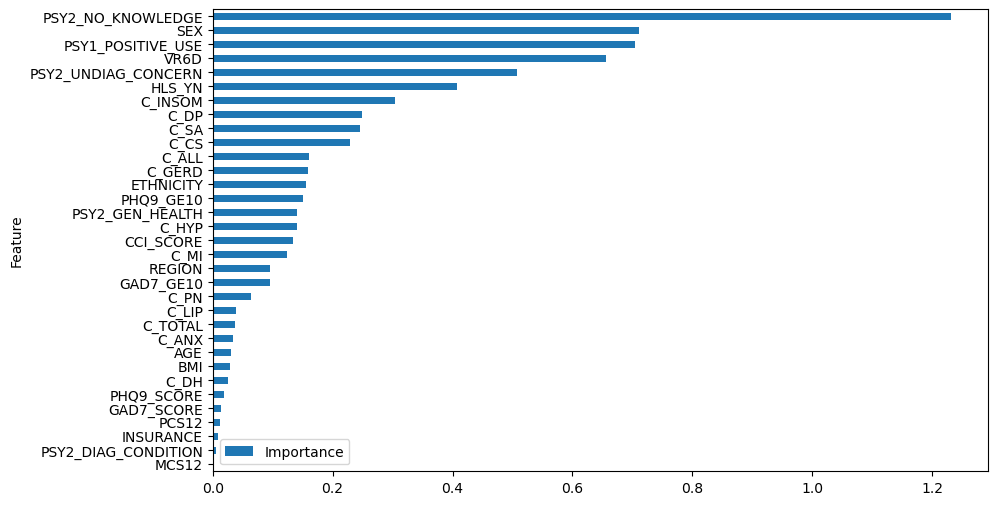

In [24]:
coef_values = model2.coef_[0]

feature_importance = pd.DataFrame({'Feature': X2.columns, 'Importance': np.abs(coef_values)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))